In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.normal?

In [3]:
x = np.random.normal(loc=5, scale=1, size=20)
y = np.random.normal(loc=6, scale=1, size=20)

(array([0.55582835, 0.        , 0.13895709, 0.27791418, 0.69478544,
        0.41687126, 0.13895709, 0.13895709, 0.13895709, 0.27791418]),
 array([4.01737722, 4.37720053, 4.73702385, 5.09684716, 5.45667048,
        5.81649379, 6.17631711, 6.53614043, 6.89596374, 7.25578706,
        7.61561037]),
 <a list of 10 Patch objects>)

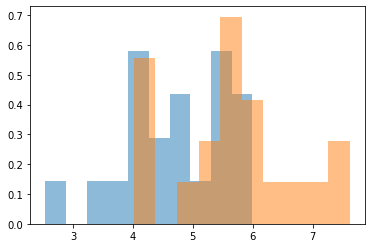

In [4]:
plt.hist(x, alpha=0.5, density=True)
plt.hist(y, alpha=0.5, density=True)

In [5]:
x.mean()

4.709354265663764

In [6]:
x.std()

0.8760553366901103

In [7]:
y.mean()

5.667777438447409

In [8]:
y.std()

1.0400156261238955

In [9]:
import scipy.stats as stats

In [10]:
stats.ttest_ind(x,y)

Ttest_indResult(statistic=-3.072226748698627, pvalue=0.003916458324046536)

10
Ttest_indResult(statistic=-2.516309002737602, pvalue=0.021563733458206252)
------------------
20
Ttest_indResult(statistic=-1.5696398624468417, pvalue=0.12478944812319812)
------------------
30
Ttest_indResult(statistic=-1.726539719570829, pvalue=0.08957370803881214)
------------------
100
Ttest_indResult(statistic=-3.7587218012702115, pvalue=0.00022468546555573526)
------------------
1000
Ttest_indResult(statistic=-10.628558771114566, pvalue=1.0511686332860548e-25)
------------------


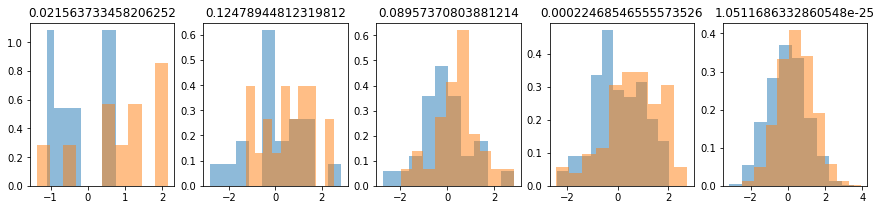

In [11]:
mu1 = 0
mu2 = 0.5
sigma1 = 1
sigma2 = 1

f, axs = plt.subplots(1,5, figsize=(15,3))
for i, n in enumerate([10, 20, 30, 100, 1000]):
    x = np.random.normal(loc=mu1, scale=sigma1, size=n)
    y = np.random.normal(loc=mu2, scale=sigma2, size=n)
    axs[i].hist(x, alpha=0.5, density=True)
    axs[i].hist(y, alpha=0.5, density=True)
    
    print(n)
    print(stats.ttest_ind(x,y))
    axs[i].set_title(stats.ttest_ind(x,y).pvalue)
    print('------------------')

In [12]:
n_samples = 50

Ttest_indResult(statistic=-1.2082809343804013, pvalue=0.22984678288592697)


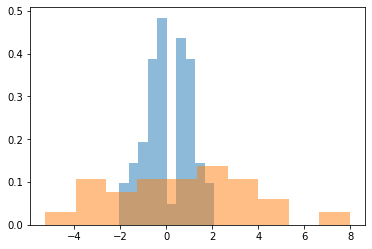

In [13]:
mu1 = 0
mu2 = 1
sigma1 = 1
sigma2 = 3
x = np.random.normal(loc=mu1, scale=sigma1, size=n_samples)
y = np.random.normal(loc=mu2, scale=sigma2, size=n_samples)
plt.hist(x, alpha=0.5, density=True)
plt.hist(y, alpha=0.5, density=True)

print(stats.ttest_ind(x,y))

In [14]:
print(stats.ttest_ind(x,y))

Ttest_indResult(statistic=-1.2082809343804013, pvalue=0.22984678288592697)


In [15]:
stats.ttest_ind(x,y).pvalue

0.22984678288592697

In [16]:
stats.mannwhitneyu(x,y, alternative='two-sided')

MannwhitneyuResult(statistic=1037.0, pvalue=0.14293818231643227)

In [17]:
n_iter = 1000

In [18]:


mus1 = [0, 0]
mus2 = [0, 1]
for mu, mu2 in zip(mus1, mus2):
    t_reject_count = 0
    mwu_reject_count = 0    
    for i in range(n_iter):    
        x = np.random.normal(loc=mu1, scale=sigma1, size=n_samples)
        y = np.random.normal(loc=mu2, scale=sigma2, size=n_samples)
        t_pvalue = stats.ttest_ind(x,y).pvalue
        mwu_pvalue = stats.mannwhitneyu(x,y, alternative='two-sided').pvalue
        t_reject = int(t_pvalue < 0.05) # 0 or 1
        t_reject_count += t_reject
        mwu_reject = int(mwu_pvalue < 0.05) # 0 or 1
        mwu_reject_count += mwu_reject
    print('Mu:', mu1, mu2)
    print('h0 rejected by mann-whitney:', mwu_reject_count)
    print('h0 rejected by t:',t_reject_count)
    

Mu: 0 0
h0 rejected by mann-whitney: 62
h0 rejected by t: 47
Mu: 0 1
h0 rejected by mann-whitney: 575
h0 rejected by t: 593


In [19]:
# def my_pdf(x):

w1=0.7
w2=0.3
mu1=0
mu2=5

class my_distribution(stats.rv_continuous):
#     def init(self, mu1, w1, mu2, w2, **kwargs):
#         super().init(**kwargs)
#         self.mu1=mu1
#         self.mu2=mu2
#         self.w1 = w1
#         self.w2 = w2
    def _pdf(self, x):
        return (w1* np.exp(-(x-mu1)**2 / 2.)+ w2*np.exp(-(x-mu2)**2 / 2.) )/ np.sqrt(2.0 * np.pi)


In [20]:
distribution = my_distribution()
distribution.rvs()    

-0.7999452639545377

In [21]:
x=distribution.rvs(size=1000)

In [22]:
print('mean:',x.mean() )
print('std:',x.std())

mean: 1.4955234410872447
std: 2.4912329637354267


In [24]:
means = []
for i in range(50):
    x=distribution.rvs(size=50)
    means.append(x.mean())

(array([ 2.,  1.,  8.,  7., 10., 11.,  4.,  4.,  1.,  2.]),
 array([0.7953261 , 0.95269202, 1.11005795, 1.26742387, 1.42478979,
        1.58215571, 1.73952163, 1.89688755, 2.05425347, 2.21161939,
        2.36898531]),
 <a list of 10 Patch objects>)

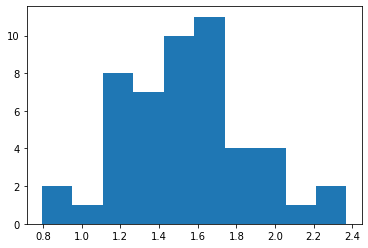

In [25]:
plt.hist(means)

In [ ]:
# # Set-up.
# n = 10000
# numpy.random.seed(0x5eed)
# # Parameters of the mixture components
# norm_params = np.array([[5, 1],
#                         [1, 1.3],
#                         [9, 1.3]])
# n_components = norm_params.shape[0]
# # Weight of each component, in this case all of them are 1/3
# weights = np.ones(n_components, dtype=np.float64) / 3.0
# # A stream of indices from which to choose the component
# mixture_idx = numpy.random.choice(len(weights), size=n, replace=True, p=weights)
# # y is the mixture sample
# y = numpy.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
#                    dtype=np.float64)

# # Theoretical PDF plotting -- generate the x and y plotting positions
# xs = np.linspace(y.min(), y.max(), 200)
# ys = np.zeros_like(xs)

# for (l, s), w in zip(norm_params, weights):
#     ys += ss.norm.pdf(xs, loc=l, scale=s) * w

# plt.plot(xs, ys)
# plt.hist(y, normed=True, bins="fd")
# plt.xlabel("x")
# plt.ylabel("f(x)")
# plt.show()

In [ ]:
# laplace distribution

Ttest_indResult(statistic=-2.122495166541795, pvalue=0.03631656613527461)
MannwhitneyuResult(statistic=844.0, pvalue=0.0025914243307791846)


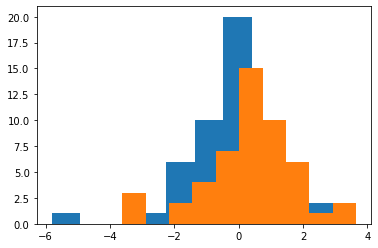

In [26]:
sample_size=50
loc1=0
loc2=0.5
x1 = np.random.laplace(loc=loc1, scale=1.0, size=sample_size)
x2 = np.random.laplace(loc=loc2, scale=1.0, size=sample_size)
plt.hist(x1)
plt.hist(x2)
p_t = stats.ttest_ind(x1,x2)
p_mwu = stats.mannwhitneyu(x1,x2)
print(p_t)
print(p_mwu)

In [ ]:
# power = P(reject H0 | H1 is true)
# H0: mu1=mu2
# H1: mu1!=mu2
# type 1 error: P(reject H0 | H0 is true) == alpha?


In [30]:
def errors_check(distrib_generator, n_samples, n_iterations, loc1=0, loc2=0):
    pvalues_t = np.zeros(n_iterations)
    pvalues_mwu = np.zeros(n_iterations)
    for i in range(n_iterations):
        x1 = distrib_generator(loc=loc1, scale=1.0, size=n_samples)
        x2 = distrib_generator(loc=loc2, scale=1.0, size=n_samples)
        pvalues_t[i] = stats.ttest_ind(x1,x2).pvalue
        pvalues_mwu[i] = stats.mannwhitneyu(x1,x2,alternative='two-sided').pvalue
    #pvalues_t = np.array(pvalues_t)
    
    for test_name, pvals in zip(['t-test','MWu-test'],[pvalues_t, pvalues_mwu]):
        rejected = pvals < 0.05
        n_rejected = rejected.sum()
        n_accepted = n_iterations - n_rejected
        print(test_name)
        print('accepted: {}/{}'.format(n_accepted, n_iterations))
        print('rejected: {}/{}'.format(n_rejected, n_iterations))
        if loc1==loc2:
            print('Type 1 error:', n_rejected/n_iterations)
        if loc1!=loc2:
            print('effect size:', loc2-loc1)
            print('Type 2 error:', n_accepted/n_iterations)

In [31]:
errors_check(np.random.laplace, n_samples=50, n_iterations=10000)

t-test
accepted: 9504/10000
rejected: 496/10000
Type 1 error: 0.0496
MWu-test
accepted: 9514/10000
rejected: 486/10000
Type 1 error: 0.0486


In [32]:
errors_check(np.random.laplace, n_samples=50, n_iterations=10000, loc1=0, loc2=0.5)

t-test
accepted: 5649/10000
rejected: 4351/10000
effect size: 0.5
Type 2 error: 0.5649
MWu-test
accepted: 4408/10000
rejected: 5592/10000
effect size: 0.5
Type 2 error: 0.4408


In [45]:
# plot power of effect_size
def get_powers_t_mwu(a, b, sample_generator, n_iterations, n_samples=50, num=101):
    reject_rates = np.zeros([2, num])
    i_effect=0
    effect_sizes = np.linspace(a,b,num)
    for effect_size in effect_sizes:
        pvalues_t = np.zeros(n_iterations)
        pvalues_mwu = np.zeros(n_iterations)
        loc1=0
        loc2=effect_size
        for i in range(n_iterations):
            x1 = sample_generator(loc=loc1, scale=1.0, size=n_samples)
            x2 = sample_generator(loc=loc2, scale=1.0, size=n_samples)
            pvalues_t[i] = stats.ttest_ind(x1,x2).pvalue
            pvalues_mwu[i] = stats.mannwhitneyu(x1,x2, alternative='two-sided').pvalue
        for itest, pvals in enumerate([pvalues_t, pvalues_mwu]):
            rejected = pvals < 0.05
            n_rejected = rejected.sum()
            reject_rate = n_rejected / n_iterations
            reject_rates[itest,i_effect]= reject_rate
        i_effect+=1
    return effect_sizes, reject_rates

In [37]:
effect, pows = get_powers_t_mwu(0,3,np.random.laplace, 1000, 200)

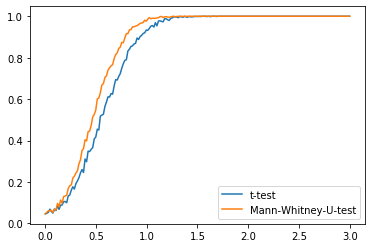

In [38]:
plt.plot(effect, pows[0,:], label='t-test')
plt.plot(effect, pows[1,:], label='Mann-Whitney-U-test')
plt.legend()

In [39]:
x1 = np.random.laplace(loc=0, scale=1.0, size=1000)
print(x1.mean())
print(x1.std())


0.05109560607125141
1.460555326015323


In [40]:
x1 = np.random.laplace(loc=1, scale=1.0, size=1000)
print(x1.mean())
print(x1.std())

0.9896237387554904
1.4260667878028013


In [43]:
effect, pows_normal = get_powers_t_mwu(0,1.5,np.random.normal, 1000, num=200)

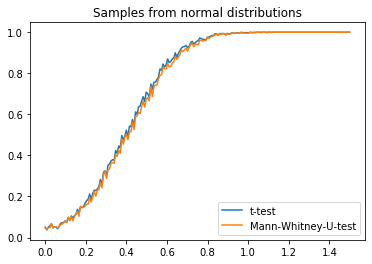

In [44]:
plt.plot(effect, pows_normal[0,:], label='t-test')
plt.plot(effect, pows_normal[1,:], label='Mann-Whitney-U-test')
plt.title('Samples from normal distributions')
plt.legend()

In [47]:
effect, pows_normal_20 = get_powers_t_mwu(0,1.5,np.random.normal, 1000, n_samples=20, num=200)

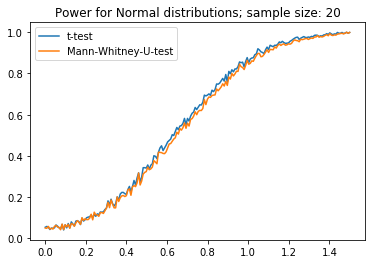

In [48]:
plt.plot(effect, pows_normal_20[0,:], label='t-test')
plt.plot(effect, pows_normal_20[1,:], label='Mann-Whitney-U-test')
plt.title('Power for Normal distributions; sample size: 20')
plt.legend()

In [52]:
effect, pows_normal_cur = get_powers_t_mwu(0,3,np.random.normal, 1000, n_samples=10, num=200)

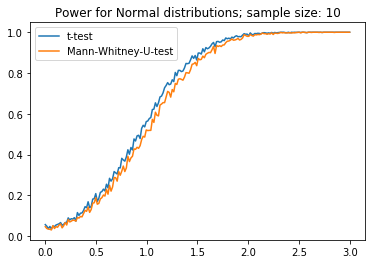

In [53]:
plt.plot(effect, pows_normal_cur[0,:], label='t-test')
plt.plot(effect, pows_normal_cur[1,:], label='Mann-Whitney-U-test')
plt.title('Power for Normal distributions; sample size: 10')
plt.legend()

## Example: paired vs unpaired (dependent / independent)

In [56]:
import seaborn as sns

In [54]:
np.random.normal?

In [107]:
x1 = np.random.normal(5,1,size=20)

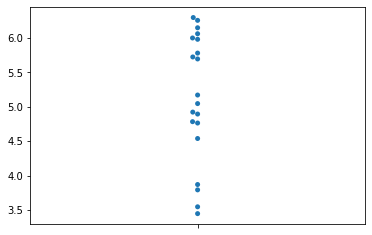

In [108]:
sns.swarmplot(y=x1)

In [133]:
difference = np.random.normal(0.2,0.2, 20)


In [134]:
difference

array([ 0.38435473, -0.03461242,  0.31030234,  0.44029632,  0.30110352,
        0.36656586, -0.16803308,  0.38939913,  0.45894789,  0.21710199,
        0.27131296,  0.42745048,  0.08294557,  0.2386099 ,  0.03254095,
       -0.14234469,  0.20482512,  0.15265617,  0.11433499,  0.24893438])

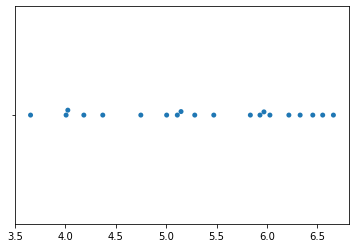

In [135]:
sns.swarmplot(x1 + difference)

In [136]:
x_gr = x1+difference

In [137]:
import pandas as pd

In [138]:
df = pd.DataFrame({'x': x1, 'y': x_gr})

In [148]:
# df

In [140]:
df.describe()

,x,y
count,20.000000,20.000000
mean,5.134778,5.349613
std,0.931678,0.943073
min,3.448226,3.653051
25%,4.706944,4.653813
50%,5.107421,5.378314
75%,5.983216,6.077298
max,6.294220,6.660786


In [141]:
melted = df.melt(value_vars=['x', 'y'], var_name='sample')

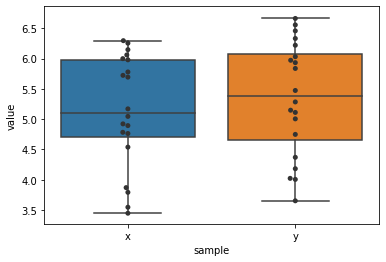

In [154]:
sns.swarmplot(x='sample', y='value', data=melted, color="0.2")
sns.boxplot(x='sample', y='value', data=melted)

In [155]:
stats.ttest_ind(df.x, df.y)

Ttest_indResult(statistic=-0.7247404750419909, pvalue=0.47305047122970656)

In [144]:
stats.ttest_rel(df.x, df.y)

Ttest_relResult(statistic=-5.153297473056488, pvalue=5.651643343827386e-05)

([<matplotlib.axis.XTick at 0x7f6e8f347860>,
 <a list of 2 Text xticklabel objects>)

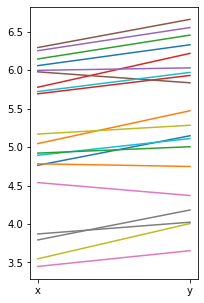

In [157]:
plt.figure(figsize=(3,5))
plt.plot(df.values.T)
plt.xticks([0,1], ['x','y'])

In [158]:
# ANOVA

In [159]:
#https://pythonfordatascience.org/anova-python/